In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from pandas.core.common import random_state

In [2]:
dset = pd.read_csv(r"C:\Users\user\Downloads\GroupProject 8(DS in python)\Dataset\(New Dataset)student-por.csv")
dset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
dset['G1 + G2'] = (dset['G1'] + dset['G2']) / 2 #Create a new attribute using G1 and G2
dset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G1 + G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.0


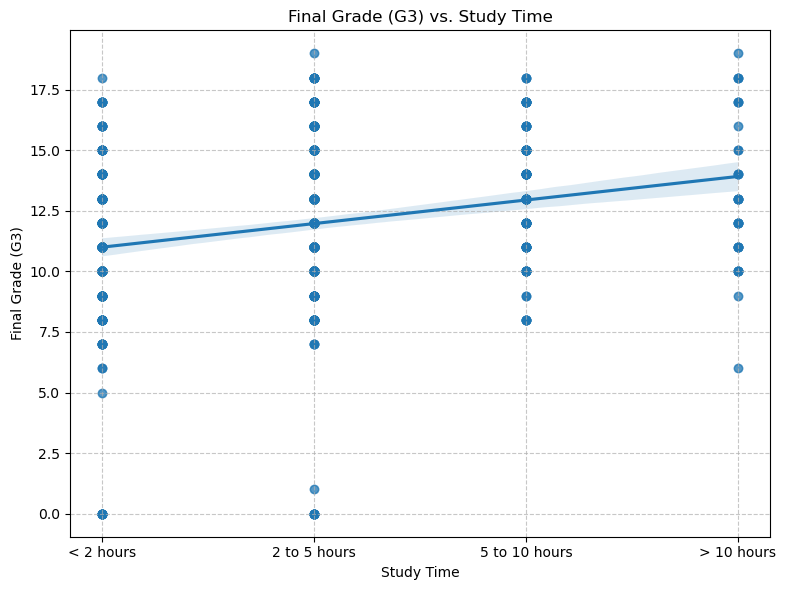

PearsonRResult(statistic=0.2497886899988629, pvalue=1.0908085906064484e-10)

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['studytime'], dset['G3'], alpha=0.5)
sns.regplot(x=dset['studytime'], y=dset['G3'], scatter_kws={'alpha':0.5})

plt.title('Final Grade (G3) vs. Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.xticks(range(1, 5), ['< 2 hours', '2 to 5 hours', '5 to 10 hours', '> 10 hours'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

corr = stats.pearsonr(dset['studytime'],dset['G3'])
corr

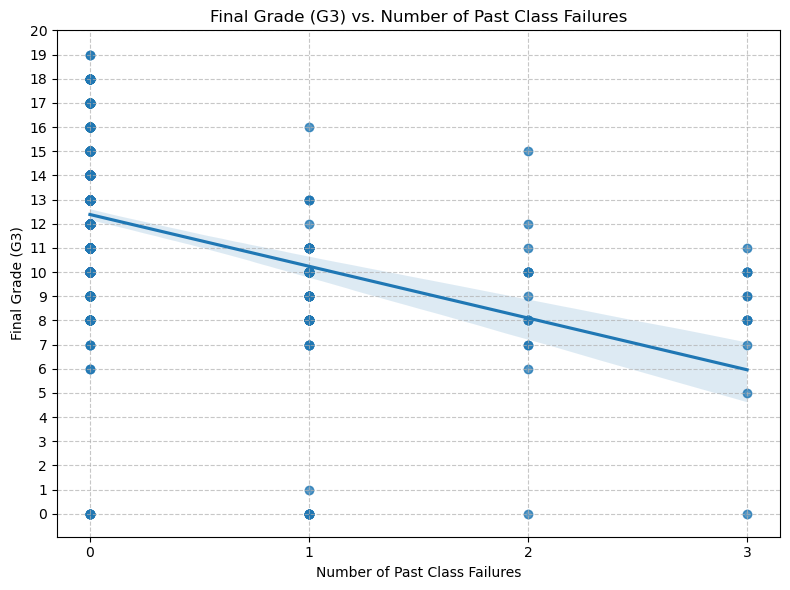

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['failures'], dset['G3'], alpha=0.5)
sns.regplot(x=dset['failures'], y=dset['G3'], scatter_kws={'alpha':0.5})

plt.title('Final Grade (G3) vs. Number of Past Class Failures')
plt.xlabel('Number of Past Class Failures')
plt.ylabel('Final Grade (G3)')
plt.xticks(range(4))
plt.yticks(range(21))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

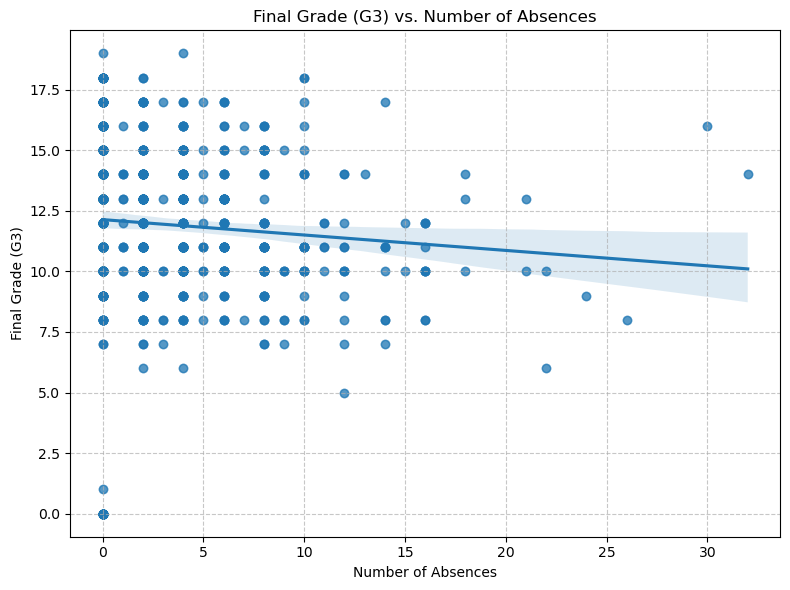

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['absences'], dset['G3'], alpha=0.5)
sns.regplot(x=dset['absences'], y=dset['G3'], scatter_kws={'alpha':0.5})

plt.title('Final Grade (G3) vs. Number of Absences')
plt.xlabel('Number of Absences')
plt.ylabel('Final Grade (G3)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

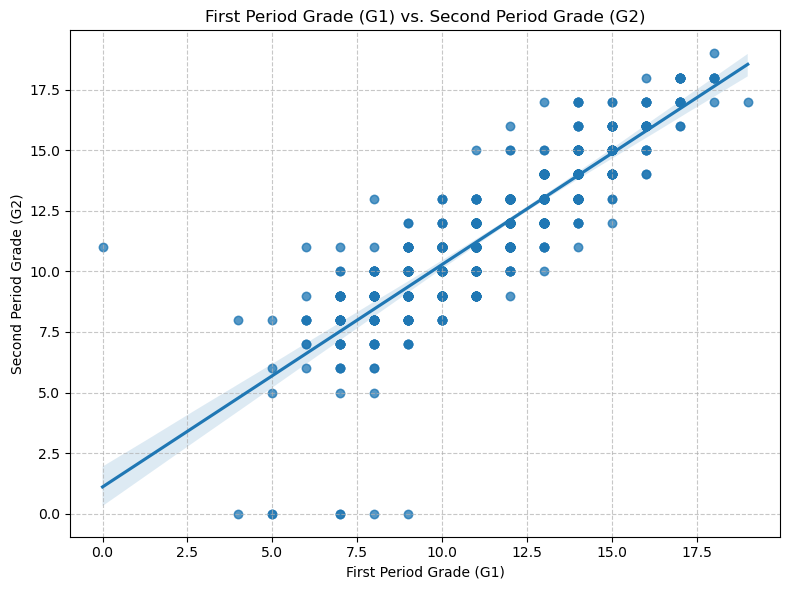

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['G1'], dset['G2'], alpha=0.5)
sns.regplot(x=dset['G1'], y=dset['G2'], scatter_kws={'alpha':0.5})

plt.title('First Period Grade (G1) vs. Second Period Grade (G2)')
plt.xlabel('First Period Grade (G1)')
plt.ylabel('Second Period Grade (G2)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

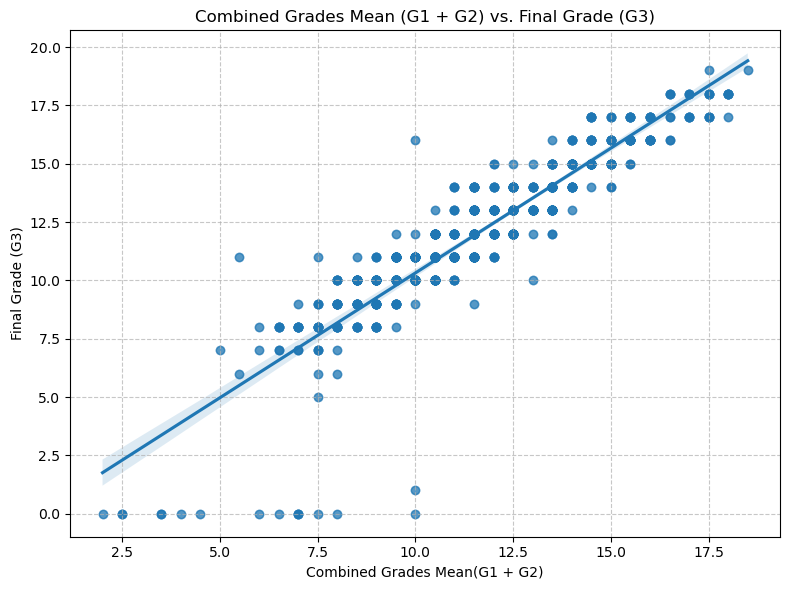

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['G1 + G2'], dset['G3'], alpha=0.5)
reg = sns.regplot(x=dset['G1 + G2'], y=dset['G3'], scatter_kws={'alpha':0.5})

plt.title('Combined Grades Mean (G1 + G2) vs. Final Grade (G3)')
plt.xlabel('Combined Grades Mean(G1 + G2)')
plt.ylabel('Final Grade (G3)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

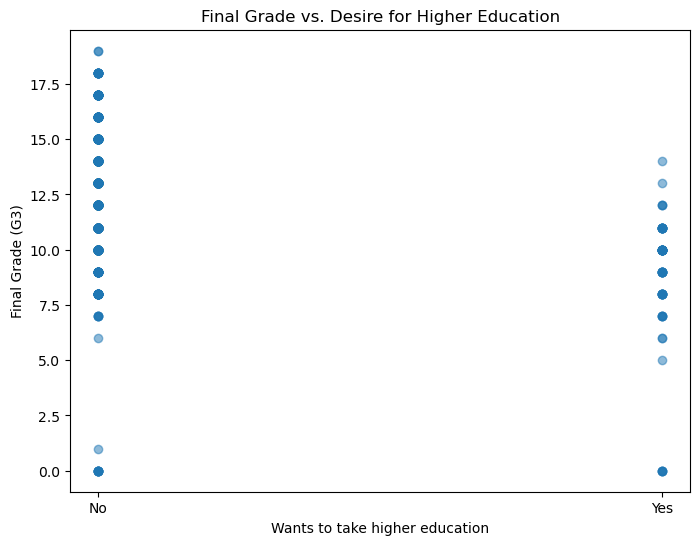

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(dset['higher'], dset['G3'], alpha=0.5)

plt.title('Final Grade vs. Desire for Higher Education')
plt.xlabel('Wants to take higher education')
plt.ylabel('Final Grade (G3)')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()